# Simple recursive sequence

To head into the concept of recursive neural networks or rnns, consider the following simple example.

Odd numbers: 1,3,5,7,9,11,13,15,...

S1 = 1

S2 = 2 + S1

S3 = 2 + S2

S4 = 2 + S3

...

St = f(St-1) for t = 2,3,4,...

f(S) = 2 + S

The unfolded and folded views of this sequence is pretty straight forward.

Suppose the odd numbers are given. S-hat is the predicted value.

S1 = 1

S-hat2 = g(S1)

S-hat3 = g(S-hat2)

...

S-hat8 = g(S-hat7)

Take g(S) = W0 + W1 * S (this is called a feedforward network)

S1 = 1

S2 = W0 + W1 * S1

S3 = W0 + W1 * S2

...

SUM( (St - (W0 - W1 * St-1))^2) for t = 2 to ...

This least squares is a REGRESSION!

W0 and W1 are calculated by the AI. Using Keras, the models looks for a mean_squared_errors.

For the example of odd numbers, Keras looks for W0 =~ 2 and W1 =~ 1 from the values given.

Each point is not i.i.d. To show the neural network in unfolded and folded forms:

Consider h to be a hidden state. The weights are going to depend on it.

h1 = a

h2 = g(S1) = f(h1, S1)

h3 = g(S2) = f(h2, S2)

...

ht = g(St-1) = f(ht-1, St-1) for t>=2 (this is a recursive process with memory, a complete history of the sequence elements that preceded)

ht = f(f(f(...)),St-1) (This can be obtained by using AI)

Three data sets are used for comparison purposes. Two are from a public website, and the third one is normalized Apple stock prices randomly gathered.

They are obtained from https://datamarket.com/data/list/?q=provider%3Atsdl in the Micro-economics section, copper prices and oil prices.

In the following code, the first two are cleaned up. The third time series is loaded already normalized in the next code.

In [1]:
# Normalize time series data
from pandas import Series
from sklearn.preprocessing import MinMaxScaler

# load the dataset
series1 = Series.from_csv('data/annual-copper-prices-18001997.csv', header=0)
series2 = Series.from_csv('data/oil-prices-in-constant-1997-doll.csv', header=0)

# prepare data for normalization
values1 = series1.values
values1 = values1.reshape((len(values1), 1))

values2 = series2.values
values2 = values2.reshape((len(values2), 1))

# train the normalization
scaler1 = MinMaxScaler(feature_range=(0, 1))
scaler1 = scaler1.fit(values1)

scaler2 = MinMaxScaler(feature_range=(0, 1))
scaler2 = scaler2.fit(values2)

#print('Min: %f, Max: %f' % (scaler.data_min_, scaler.dat$# normalize the dataset and print the first 5 rows
normalized1 = scaler1.transform(values1)
normalized1 = normalized1.squeeze()
normalized2 = scaler2.transform(values2)
normalized2 = normalized2.squeeze()
print(series1.head())
for i in range(len(values1)):
        print(normalized1[i])
print(series2.head())
for i in range(len(values2)):
        print(normalized2[i])
# inverse transform and print the first 5 rows
#inversed = scaler.inverse_transform(normalized)
#for i in range(5):
#       print(inversed[i])

Year
1800-01-01    0.246
1801-01-01    0.627
1802-01-01    0.529
1803-01-01    0.528
1804-01-01    1.086
Name: Annual Copper prices, 1800-1997, dtype: float64
0.0529922338968
0.140018273184
0.117633622659
0.117405207857
0.244860666971
0.225445408862
0.337368661489
0.0637277295569
0.0399725902238
0.119232526268
0.514846962083
0.0995888533577
0.167199634536
0.0102786660576
0.250571037003
0.449291914116
0.735038830516
0.582686158063
0.53037916857
0.448606669712
0.314527181361
0.395157606213
0.348104157149
0.251256281407
0.0159890360895
0.00822293284605
0.207629054363
0.241662859753
0.259250799452
0.343992690726
0.320009136592
0.193695751485
0.0945637277296
0.103471904979
0.14458656921
0.0105070808588
0.049109182275
0.0328917313842
0.0861123800822
0.0223846505254
0.0121059844678
0.01964367291
0.0619004111466
0.0296939241663
0.0619004111466
0.194152581087
0.118775696665
0.125399725902
0.203060758337
0.212882594792
0.140703517588
0.396299680219
0.865006852444
0.781407035176
0.672453174966
0.

/root/miniconda3/envs/tensorflow/lib/python3.5/site-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [2]:
### Load in necessary libraries for data input
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from my_functions import *

%load_ext autoreload
%autoreload 2

from my_functions import *

### load in the normalized the dataset
dataset1 = np.loadtxt(normalized1)
dataset2 = np.loadtxt(normalized2)
dataset3 = np.loadtxt('data/normalized_apple_prices.csv')

Using TensorFlow backend.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Text(0,0.5,'normalized series1 value - copper prices - 1800-1997')

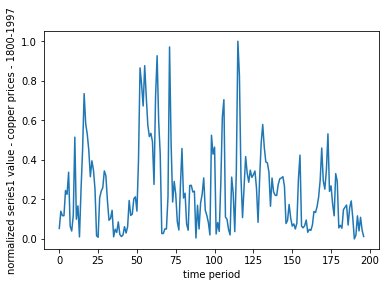

In [3]:
# lets take a look at our time series1
plt.plot(dataset1)
plt.xlabel('time period')
plt.ylabel('normalized series1 value - copper prices - 1800-1997')

Text(0,0.5,'normalized series2 value - oil prices - 1870 - 1997')

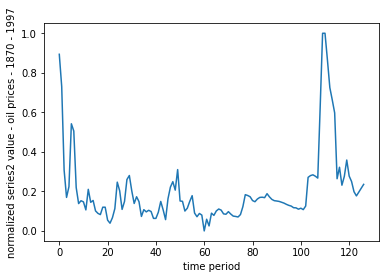

In [4]:
# lets take a look at our time series2
plt.plot(dataset2)
plt.xlabel('time period')
plt.ylabel('normalized series2 value - oil prices - 1870 - 1997')

Text(0,0.5,'normalized series3 value - normalized apple prices')

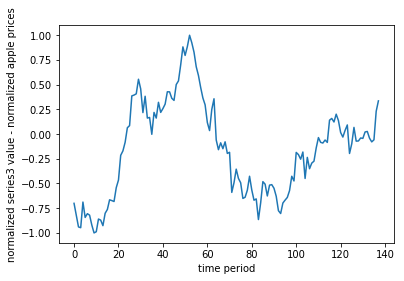

In [5]:
plt.plot(dataset3)
plt.xlabel('time period')
plt.ylabel('normalized series3 value - normalized apple prices' )

In [6]:
from my_functions import window_transform_series
window_size = 7
X1,y1 = window_transform_series(series = dataset1,window_size = window_size)
X2,y2 = window_transform_series(series = dataset2,window_size = window_size)
X3,y3 = window_transform_series(series = dataset3,window_size = window_size)

In [7]:
# split our dataset into training / testing sets
train1_test_split = int(np.ceil(2*len(y1)/float(3)))   # set the split point
train2_test_split = int(np.ceil(2*len(y2)/float(3)))   # set the split point
train3_test_split = int(np.ceil(2*len(y2)/float(3)))   # set the split point

# partition the training set
X1_train = X1[:train1_test_split,:]
X2_train = X2[:train2_test_split,:]
X3_train = X3[:train3_test_split,:]

y1_train = y1[:train1_test_split]
y2_train = y2[:train2_test_split]
y3_train = y3[:train3_test_split]

# keep the last chunk for testing
X1_test = X1[train1_test_split:,:]
X2_test = X2[train2_test_split:,:]
X3_test = X3[train3_test_split:,:]

y1_test = y1[train1_test_split:]
y2_test = y2[train2_test_split:]
y3_test = y3[train3_test_split:]

# NOTE: to use keras's RNN LSTM module our input must be reshaped to [samples, window size, stepsize] 
X1_train = np.asarray(np.reshape(X1_train, (X1_train.shape[0], window_size, 1)))
X2_train = np.asarray(np.reshape(X2_train, (X2_train.shape[0], window_size, 1)))
X3_train = np.asarray(np.reshape(X3_train, (X3_train.shape[0], window_size, 1)))

X1_test = np.asarray(np.reshape(X1_test, (X1_test.shape[0], window_size, 1)))
X2_test = np.asarray(np.reshape(X2_test, (X2_test.shape[0], window_size, 1)))
X3_test = np.asarray(np.reshape(X3_test, (X3_test.shape[0], window_size, 1)))

In [8]:
# import keras network libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import keras

# given - fix random seed - so we can all reproduce the same results on our default time series
np.random.seed(0)


# implement build_part1_RNN in my_answers.py
from my_functions import build_part1_RNN
model = build_part1_RNN(window_size)

# build model using keras documentation recommended optimizer initialization
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# compile the model
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [9]:
# run your model 1!
model.fit(X1_train, y1_train, epochs=1024, batch_size=8, verbose=0)

In [10]:
# run your model 2!
model.fit(X2_train, y2_train, epochs=1024, batch_size=8, verbose=0)

In [11]:
# run your model 3!
model.fit(X3_train, y3_train, epochs=1024, batch_size=8, verbose=0)

In [12]:
# generate predictions for training
train1_predict = model.predict(X1_train)
test1_predict = model.predict(X1_test)

train2_predict = model.predict(X2_train)
test2_predict = model.predict(X2_test)

train3_predict = model.predict(X3_train)
test3_predict = model.predict(X3_test)

In [13]:
# print out training and testing errors
training1_error = model.evaluate(X1_train, y1_train, verbose=0)
print('training error 1 = ' + str(training1_error))

testing1_error = model.evaluate(X1_test, y1_test, verbose=0)
print('testing error 1 = ' + str(testing1_error))

training2_error = model.evaluate(X2_train, y2_train, verbose=0)
print('training error 2 = ' + str(training2_error))

testing2_error = model.evaluate(X2_test, y2_test, verbose=0)
print('testing error 2 = ' + str(testing2_error))

training3_error = model.evaluate(X3_train, y3_train, verbose=0)
print('training error 3 = ' + str(training3_error))

testing3_error = model.evaluate(X3_test, y3_test, verbose=0)
print('testing error 3 = ' + str(testing3_error))

training error 1 = 0.0439183791498
testing error 1 = 0.0111772967207
training error 2 = 0.00344390878454
testing error 2 = 0.0117320565507
training error 3 = 0.0145669881254
testing error 3 = 0.0156475574545


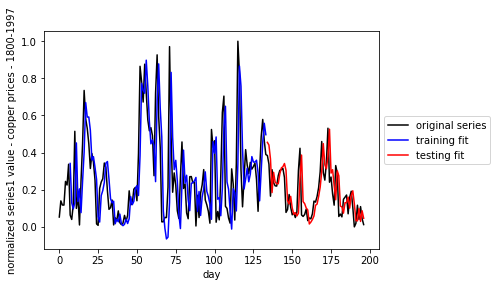

In [14]:
### Plot everything - the original series as well as predictions on training and testing sets
import matplotlib.pyplot as plt
%matplotlib inline

# plot original series
plt.plot(dataset1,color = 'k')

# plot training set prediction
split1_pt = train1_test_split + window_size 
plt.plot(np.arange(window_size,split1_pt,1),train1_predict,color = 'b')

# plot testing set prediction
plt.plot(np.arange(split1_pt,split1_pt + len(test1_predict),1),test1_predict,color = 'r')

# pretty up graph
plt.xlabel('day')
plt.ylabel('normalized series1 value - copper prices - 1800-1997')
plt.legend(['original series','training fit','testing fit'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

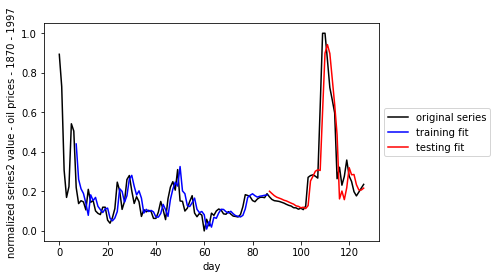

In [15]:
# plot original series
plt.plot(dataset2,color = 'k')

# plot training set prediction
split2_pt = train2_test_split + window_size 
plt.plot(np.arange(window_size,split2_pt,1),train2_predict,color = 'b')

# plot testing set prediction
plt.plot(np.arange(split2_pt,split2_pt + len(test2_predict),1),test2_predict,color = 'r')

# pretty up graph
plt.xlabel('day')
plt.ylabel('normalized series2 value - oil prices - 1870 - 1997')
plt.legend(['original series','training fit','testing fit'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

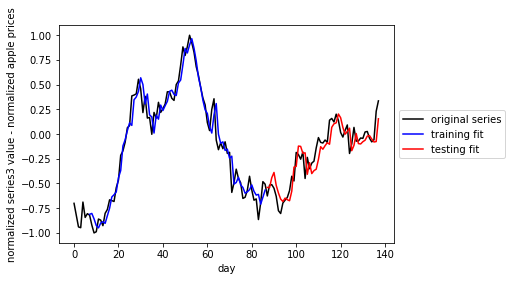

In [16]:
# plot original series
plt.plot(dataset3,color = 'k')

# plot training set prediction
split3_pt = train3_test_split + window_size 
plt.plot(np.arange(window_size,split3_pt,1),train3_predict,color = 'b')

# plot testing set prediction
plt.plot(np.arange(split3_pt,split3_pt + len(test3_predict),1),test3_predict,color = 'r')

# pretty up graph
plt.xlabel('day')
plt.ylabel('normalized series3 value - normalized apple prices')
plt.legend(['original series','training fit','testing fit'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

The original series is not a recursive series. The training fit series is a recursive series. Having a window of size 7, each point in the testing fit is an output from seven data points from the original series and not from the traing fit. So this methods is used in the bleeding edge of short term prediction of one period (hours, days, weeks, months, and years).

## What we are interested in is the last prediction for any financial strategy we want to use!

There are many factors that this model integrates in the AI engine. 